In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700
1,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800
2,2022-08-31,280.619995,281.250000,271.809998,275.609985,275.609985,52107300
3,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000
4,2022-09-02,281.070007,282.350006,269.079987,270.209991,270.209991,50890100
5,2022-09-06,272.679993,275.989990,265.739990,274.420013,274.420013,55860000
6,2022-09-07,273.100006,283.839996,272.269989,283.700012,283.700012,50028900
7,2022-09-08,281.299988,289.500000,279.760010,289.260010,289.260010,53713100
8,2022-09-09,291.670013,299.850006,291.250000,299.679993,299.679993,54338100
9,2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013,48674600


In [7]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Epoch 1/2
7/7 [==============================] - 3s 5ms/step - loss: 0.2304
Epoch 2/2
2/2 [==============================] - 1s 5ms/step


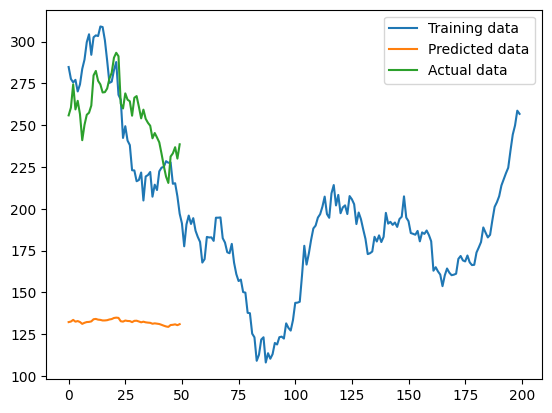

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# Load the data
df = pd.read_csv("TSLA.csv")
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(train_data, train_data, epochs=2, batch_size=32)
# Evaluate the model
test_predictions = model.predict(test_data)
test_predictions = scaler.inverse_transform(test_predictions)
# Plot the results
plt.plot(scaler.inverse_transform(train_data), label='Training data')
plt.plot(test_predictions, label='Predicted data')
plt.plot(scaler.inverse_transform(test_data), label='Actual data')
plt.legend()
plt.show()